## Bertscore between Chinese texts and English translations

This notebook contains the codes of calculating bertscores between Chinese texts and English transaltions for setting up a baseline.

In [2]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://pypi.tuna.tsinghua.edu.cn/simple/


In [17]:
import pandas as pd

def load_csv_with_encoding(file_path):
    encodings = ['utf-8', 'ISO-8859-1', 'Windows-1252'] 
    for encoding in encodings:
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            return df
        except UnicodeDecodeError:
            continue
    raise ValueError("None of the encodings worked. Check the file's encoding.")

file_path = 'C:/Users/idaid/Desktop/MA Thesis/data/multilingual analysis_cn translated to en.csv'

# Load the DataFrame using the function
df = load_csv_with_encoding(file_path)

# Display the first few rows to check if the data is loaded correctly
print(df.head())

    category                                               text  \
0  detective  ¡°³à¾®ÐãÒ»ËÀÁË¡£»ù¶ûÉ±µÄ¡£ÓÉÄãÕâÎ»Ç°ÅÑÍ½µÄºÃÓÑ...   
1  detective  ¡°Çë×ø¡£¡±ÇàÄêÐ¦³öÂú¿Ú°×ÑÀ£¬ÀÖºÇºÇµÄÑù×Óµ¹ÕæÏñ...   
2  detective  È»¶ø£¬ÕâÖÜÎåµÄÔçÉÏ×¢¶¨ÊÇÍÑÀë³£ÊýµÄÒ»Ìì¡£Å®ÈËÉì...   
3       love  µ«¶¡È¥È¡Ë®»¨µÄÊ±¼ä±ÈÔ¤ÏëÖÐ³¤£¬ËûÄ¥Ä¥²ä²äµØÄÃ×Å...   
4       love  É£²¼À×¿ËµÄÏÄ¼¾ÎÂºÍÉÙÓê£¬×øÔÚÂí³µÉÏµÄµÒÎÌÈ´ÏÔµÃ...   

                                 English translation  \
0  "Akai Shuichi is dead. Killed by Kiel. Let you...   
1  "Please sit down." The young man smiled with a...   
2  However, this Friday morning was destined to b...   
3  Dante took longer than expected to get the wat...   
4  The summer in Sanbrek is mild and rainless, bu...   

                         analysis of English version  
0  Summary: The text is about a conversation betw...  
1  Summary: Cao Enqi meets Huang Zihongfan in a s...  
2  Summary: The text describes a man observing a ...  
3  Summary: Tracy is surprised by Dante'

In [18]:
import re
# Clean the data
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the "English translation" column
df['English translation'] = df['English translation'].apply(clean_text)

# Display the cleaned data
print(df['English translation'].head())

0    akai shuichi is dead killed by kiel let your f...
1    please sit down the young man smiled with a mo...
2    however this friday morning was destined to be...
3    dante took longer than expected to get the wat...
4    the summer in sanbrek is mild and rainless but...
Name: English translation, dtype: object


In [19]:
df.to_csv('C:/Users/idaid/Desktop/MA Thesis/data/cleaned_multilingual analysis_cn translated to en.csv', index=False)

In [1]:
!pip install transformers
!pip install bert-score

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://pypi.tuna.tsinghua.edu.cn/simple/
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://pypi.tuna.tsinghua.edu.cn/simple/


In [1]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load the model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
model = AutoModel.from_pretrained("bert-base-multilingual-cased")

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [2]:
def get_embedding(text):
    # Encode the text
    encoded_input = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=128)
    # Generate the text vector
    with torch.no_grad():
        model_output = model(**encoded_input)
    # Use the average of the last layer's outputs as the text vector
    embeddings = model_output.last_hidden_state.mean(dim=1)
    return embeddings

# Example FF_C_E_1
# Chinese text
text1 = "赤井秀一死了。基尔杀的。由你这位前叛徒的好友去确认一下。你应该不会出问题吧，苏格兰？他选择的居然是基尔？我还以为会是你给他‘最后一吻’呢，琴酒。对面重重啧了一声，挂断电话。黑发蓝眼的男人与旁边偷听的陌生人对上视线，耸耸肩笑了笑，没再去看对方尴尬的表情，摁灭屏幕，收起手机，抬头望向前方已经开始排队的登机口。由吉隆坡国际机场出发、前往日本东京的旅客请注意，您乘坐的JL414次航班现在开始登机。请带好您的随身物品，出示登机牌，由3号登机门登机。祝您旅途愉快。谢谢！"
# English translation
text2 = "akai shuichi is dead killed by kiel let your friend the former traitor confirm it you shouldnt have any problems right scotland he chose kiel i thought it would be you who gave him the last kiss gin the other party made a heavy click of the tongue and hung up the phone the blackhaired blueeyed man met the eyes of the eavesdropping stranger next to him shrugged and smiled and did not look at the others embarrassed expression he turned off the screen put away his phone and looked up at the boarding gate in front of him where the queue had already begun passengers departing from kuala lumpur international airport to tokyo japan please note that your flight jl is now boarding please take your personal belongings show your boarding pass and board at gate have a nice trip thank you bourbon investigate the truth behind akai shuichis death time is money received you really cant keep me quiet rum in a villa in the suburbs of london a blond darkskinned man put down his phone leaned back and stretched he stretched his neck and fingers slightly casually opened a page on the laptop next to him and booked a flight from heathrow airport to haneda airport in japan in seven days first class he plugged a usb drive into another computer dragged the file out of it with the mouse and pulled it into a software to start parsing the white light and black words on the screen were reflected in his drooping purplegray eyes the man muttered inaudibly in a room where no one was except himself after i get rid of you i will have to find someone who will not let people rest in peace even if he dies you better be worth the money"

# Get vectors for both texts
embed1 = get_embedding(text1)
embed2 = get_embedding(text2)

# Calculate cosine similarity
cosine_similarity = torch.nn.functional.cosine_similarity(embed1, embed2)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.7234802842140198


In [3]:
# Example FF_C_E_2

text3 = "请坐。青年笑出满口白牙，乐呵呵的样子倒真像那些打着算盘的生意人。我叫黄子弘凡，你叫我黄子便可。曹恩齐把遮面的斗笠摘下来，随手放在桌上，略鞠一躬，曹恩齐，请多指教。不必客气。黄子弘凡神色微微一动，示意他坐下，大大咧咧地拍了拍他的肩膀，提手斟好一杯热茶，小店粗茶，招待不周，还望谅解。黄掌柜才是客气了。曹恩齐也不推让，一口饮尽，在略带惊讶和欣赏的目光中补充，方才小厮既说掌柜不再加座，听完你的邀约又毫无疑义，我想这彩云楼的掌柜也不会有他人了。掌柜真是年轻有为。就不能是我作为食客盛情难却吗？黄子弘凡笑得更开心了，黄子便可。如果想低调些，下次可以换身行头。曹恩齐扫了眼他白袍上细密精致的刺绣，忽地压低声音，黄子弘凡，一位故人托我给彩云楼送个口信。故人？他不动声色地反问，给自己也续上清茶，端起瓷杯抿了一口。是名道长，名叫蒲熠星。他说，以防万一。黄子弘凡的表情凝固了一瞬，眼里闪过悲伤之色，手竟是难以控制地颤抖起来。他垂下头，收起笑容后的面庞带了肃杀的意味，阿蒲的消息还是太迟了。南波门，被灭了。此言一出，曹恩齐浑身一冷。"
text4 = "please sit down the young man smiled with a mouthful of white teeth and his cheerful look really looked like those businessmen who were calculating my name is huang zihongfan you can just call me huang zi cao enqi took off the hat that covered his face put it on the table casually and bowed slightly cao enqi please give me more advice youre welcome huang zihongfans expression moved slightly motioned him to sit down patted his shoulder carelessly and poured a cup of hot tea this is a small shop i hope you can understand that the hospitality is not good shopkeeper huang is polite cao enqi did not refuse drank it in one gulp and added with a slightly surprised and appreciative look just now the servant said that the shopkeeper would not add more seats and after listening to it your invitation is no doubt i think there will be no other person in the shopkeeper of the caiyun tower in low voice huang zi hongfan an old man asked me to send a letter to caiyun tower the old man he asked calmly and continued to clear the tea for himself and took a sip of the porcelain cup shaking he dangled his head and put his face with a smile on his face the news of apu was too late nanbomen was destroyed as soon as this remark cao enqi was cold"

embed3 = get_embedding(text3)
embed4 = get_embedding(text4)

cosine_similarity = torch.nn.functional.cosine_similarity(embed3, embed4)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.6841883659362793


In [4]:
# Example FF_C_E_3

text5 = "然而，这周五的早上注定是脱离常数的一天。女人伸个懒腰，露出赏心悦目的女性身体曲线，还有此刻的美景，男人享受这两件东西。突然，女人神色变了，下一秒她的牙齿开始打颤，别的人很难注意这样的细节，但枕边人可以，从眼神里他看出女人的眼神已经完全被恐惧占领。女人用一种男人从未听过的声音颤颤巍巍地说：Johnny，你看，那边躺着的是不是个人啊？越过呆呆瘫坐在草坪上的报案人，抬起黄色警戒线，Marty照例先去看了一眼受害人。除了个别特殊情况，比如赤身裸体跪姿戴鹿角的女人，大部分受害人相比之下还是相对平凡不起眼的。就像这个受害人，和他年轻相仿，伤在后脑，于是正面躺着的时候几乎看不出什么伤痕，只是他的眼睛圆睁着，似乎还在惊愕死亡就这么来了，而死亡又让那一瞬的惊愕凝固，最后在现场勘察人员的相机里结成一张纸。死亡时间是什么时候？由肝脏温度推断，死亡时间为昨天晚上大约十点左右。Marty在他的笔记本上写了点什么，这个笔记本不大也不小，写完他下意识往自己来时的方向看了一眼。"
text6 = "however this friday morning was destined to be a day out of the norm the woman stretched revealing the pleasing curves of her female body and the beautiful scenery at the moment the man enjoyed these two things suddenly the womans expression changed and the next second her teeth began to tremble others could hardly notice such details but the man next to her could he could see from her eyes that the womans eyes were completely occupied by fear the woman said tremblingly in a voice that the man had never heard before johnny look is that a person lying over there marty went past the reporter who was sitting on the lawn in a daze raised the yellow cordon and took a look at the victim as usual except for some special cases such as the naked woman wearing deer antlers while kneeling most of the victims were relatively ordinary and inconspicuous just like this victim who was about the same age as him the injury was on the back of the head so when he was lying on the front there was almost no scar but his eyes were wide open as if he was still shocked that death had come like this and death solidified the shock of that moment and finally formed into a piece of paper in the camera of the onsite investigators when was the time of death based on the liver temperature the time of death was about ten oclock last night marty wrote something in his notebook which was neither big nor small after writing he subconsciously looked in the direction he came from whats the cause of death preliminary observation is that the middle meningeal artery was damaged due to skull fracture which in turn caused epidural hematoma the old policeman has seen at least eighty such causes of death caused by blunt objects hitting the back of the head despite this marty still wrote it down after writing he looked in the same direction again then he squatted down and carefully observed the only wound it didnt look big it was probably because the angle was very tricky and hit the artery as if he had a sense of it he turned around and rust was walking towards him he walked very straight and martys heart skipped a beat in a trance he thought it was still fortunately he reacted in time and reached out to lift the warning belt for rust rust cooperated well with him and got in nimbly with a slight lowering of his body marty dutifully reported what he had just recorded in his ear rust stood beside the body and stared at it marty stared at his profile and brow bone looking thoughtful so he believed in his observation the wallet is gone maybe it was just a robbery the robber didnt hit hard but just hit the artery isnt this place suitable for close people to come such a beautiful scenery rust said in the background johnny was brushing his girlfriends hair aside and consoling her attentively firmly telling her that everything would be fine an ordinary policeman in uniform walked towards them although there is no wallet we found some receipts in the deceaseds pocket i think you should take a look at this one it was a receipt for a meal at the cafeteria of princeton teaching hospital the time was yesterday and two hamburgers and fries were ordered generally speaking the hospital implements a meal delivery system for patients which means that it is very likely that the deceased was a hospital employee"

embed5 = get_embedding(text5)
embed6 = get_embedding(text6)

cosine_similarity = torch.nn.functional.cosine_similarity(embed5, embed6)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.7503281831741333


In [5]:
# Example FF_C_E_4

text7 = "但丁去取水花的时间比预想中长，他磨磨蹭蹭地拿着水走进来，眼神略带探究的意味，来回扫视着翠西的眼睛和小腹。翠西被他盯得不自在，疑惑地蹙起眉头，内心升腾起不祥的预感，与此同时也做好了心理建设，去接住但丁又粗手粗脚搞砸了某些小事的坦白。怎么了？先喝水。但丁把水杯塞进她的手里，堵住她的话。直到亲眼看着她喝下，从她手中接过水杯放好，才继续说下去：你有没有觉得头晕乏力？嗯。看他郑重其事的态度，翠西也认真了几分。全身发热，恶心想吐，嗜睡多梦，这些都有吗？都有……那最近情绪起伏大吗？"
text8 = "dante took longer than expected to get the water he walked in with the water slowly his eyes slightly probing scanning tracys eyes and lower abdomen tracy felt uncomfortable being stared at by him frowning in confusion with an ominous premonition rising in her heart at the same time she also prepared herself mentally to receive dantes confession that he had messed up some small things again whats wrong drink water first dante stuffed the water cup into her hand to stop her from talking only after watching her drink it with his own eyes taking the water cup from her hand and putting it away did he continue do you feel dizzy and weak yeah seeing his serious attitude tracy also took it seriously fever nausea vomiting sleepiness and dreaminess do you have these all of them have you had a lot of mood swings recently what do you want to say dr dante tracy couldnt help but tease dantes face looked bad as if he was considering more appropriate words after hesitating for a long time he gave up resistance and uttered the answer word by word are you pregnant pregnant how is that possible tracys smile froze on her face she denied this absurd guess without thinking but her hand covered her lower abdomen as if to cover up her guilty conscience the skin covered by her palm was hot from the inside out the abdominal cavity turned into a warm fish tank nourishing a goldfish that was rushing around it was hitting and jumping again and again and it was unclear whether it was from the twitching of stomach spasms or the fetal movement of an unknown life im just guessing go to bed quickly maybe youll be fine after a good nights sleep dante prevaricated with a lame excuse urging tracy to lie down and close her eyes quickly and even carefully tucked tracys outstretched hand into the quilt what a fool tracy sighed softly of course she failed to drive away the annoying thoughts and force herself to fall asleep"

embed7 = get_embedding(text7)
embed8 = get_embedding(text8)

cosine_similarity = torch.nn.functional.cosine_similarity(embed7, embed8)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.7262375950813293


In [6]:
# Example FF_C_E_5

text9 = "桑布雷克的夏季温和少雨，坐在马车上的狄翁却显得有些躁动不安，他一次又一次地调整坐姿，时而倚在窗上盯着远处的白龙城，时而又靠在椅背上对着车顶发呆，双手不断地摩挲他柔软的天鹅绒座椅套，命令它们在湖蓝色和深蓝色之间改变颜色。您刚刚有些失态，我的皇子。狄翁伸出手摆了摆，说：“不必再说，何况在你面前也不是第一次。能拥有这份特权是我的荣幸，先生。”泰伦斯眨眨眼，手在空中划了一个小圈，向狄翁行礼。你有时候真的很讨厌，比如说现在。他稍稍前倾，脱下手套扣住了他的手，十指穿过他的指缝。泰伦斯顺从地配合他，让二人手上的茧子吻在一起。马车颠簸，狄翁离开座位顺势跨坐在泰伦斯身上。忠心的亲卫队长没被占领的左手按住狄翁的背，好让他的团长坐得安稳一点。泰伦斯听到狄翁满意的叹息声，头埋进泰伦斯的颈窝里，金色的发丝擦过他的鼻尖，棕发的骑士闻到了光的味道。我爱你。您怎么突然说这个？因为我爱你，就像你爱我一样。那我爱的狄翁殿下能解释一下刚才发生了什么吗？你会知道的，但在此之前，你得先想一下我们在修道院学校的时候的事儿。为什么？"
text10 = "the summer in sanbrek is mild and rainless but dion sitting in the carriage seems a little restless he adjusts his sitting position again and again sometimes leaning on the window and staring at the white dragon city in the distance and sometimes leaning on the back of the chair and staring at the roof in a daze his hands constantly stroking his soft velvet seat covers commanding them to change color between lake blue and dark blue you just lost your temper my prince dion stretched out his hand and waved saying no need to say it and its not the first time in front of you its my honor to have this privilege sir terrence blinked drew a small circle in the air with his hand and saluted dion you are really annoying sometimes like now he leaned forward slightly took off his gloves and clasped his hands and passed his ten fingers through his fingers terrence obediently cooperated with him letting the calluses on their hands kiss each other the carriage was bumpy and dion left his seat and sat on terrence the loyal captain of the guards pressed dions back with his unoccupied left hand so that his captain could sit more steadily terrence heard dion sigh with satisfaction and buried his head in terrences neck the golden hair brushed his nose and the brownhaired knight smelled the light i love you why do you say this suddenly because i love you just like you love me then can my beloved dion explain what happened just now you will know but before that you have to think about what happened when we were in the monastery school why the dragon knights of sanbrek need to fight a prepared battle"

embed9 = get_embedding(text9)
embed10 = get_embedding(text10)

cosine_similarity = torch.nn.functional.cosine_similarity(embed9, embed10)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.6141031980514526


In [7]:
# Example FF_C_E_6

text11 = "早上好，苏我家主，苏我夫人。大理石墙壁的光泽让她在闷热的夏日感到一丝寒意，苏我家主与夫人都在读报纸。伊砂，你来啦？苏我夫人放下报纸，快坐下吧，要是饿了就先吃。伊砂挤出一个笑：谢谢夫人，我还不饿。苏我夫人举起报纸，伊砂你都十八岁了，再不嫁人可就晚了哦。女人的青春贬值可快了。伊砂强忍恶心，做出一副害羞的表情：夫……夫人说的是。家主见到她的反应，洋洋自得地笑了笑：女人就是麻烦，别到最后生不了孩子了还嫁不出去。家主用刀叉时，脸上的赘肉总是会跟着手臂的动作抖动。他对待食物与钱就像对地位比自己低的人一样，迫不及待地想要享用。家主说得没错。伊砂觉得自己已经什么都吃不下了。既然这样的话，夫人听到这话，高兴地往伊砂的方向转了一点，最近刚好有位大人在物色妻子，伊砂你要不要去？伊砂睁大了眼睛：现在吗？那位大人很有权势，你嫁给他可算是享福了。苏我夫人在把烂摊子交给伊砂时，最爱装作嫉妒她的样子。她花了几十万保养自己的脸，但苹果肌与嘴唇两旁的肌肉都很僵硬，让人看不出来她是不是真的在笑。伊砂也笑了笑：那就太感谢家主与夫人了，您们对我这么好，还愿意把我嫁给好人家，真是不知道该怎么报答。伊砂，你这么说我真高兴，夫人歪着眉毛对她挤出一个用力的笑，我们家里最近经济紧张，不过你的嫁妆，我们会尽力的。毕竟是我们伊砂的婚礼，总得像个贵族小姐吧？没错，像个贵族小姐。父母的遗产早就被亲戚分走了，她在苏我家的价值与一幅画差不多。嫁人后，她又会有多少价值呢？您们的恩情，我会用一辈子报答。伊砂说着假话，抹着真心的眼泪。"
text12 = "good morning master soga madam soga the sheen of the marble wall made her feel a little chilly in the sultry summer master soga and madam soga were reading newspapers isa youre here madam soga put down the newspaper sit down quickly eat first if youre hungry isa forced a smile thank you madam im not hungry yet madam soga held up the newspaper isa youre already eighteen years old its too late if you dont get married womens youth depreciates quickly isa suppressed her nausea and made a shy expression husband madam is right seeing her reaction the master smiled complacently women are troublesome dont end up being unable to have children and unable to get married when the master used a knife and fork the fat on his face always trembled with the movement of his arms he treated food and money like people of lower status than himself and couldnt wait to enjoy them the master is right isa felt that he couldnt eat anything anymore in that case the lady turned a little towards isa happily after hearing this theres a gentleman whos looking for a wife recently isa do you want to go isa opened her eyes wide now that gentleman is very powerful youll be blessed if you marry him mrs soga loved to pretend to be jealous of isa when she handed the mess to her she spent hundreds of thousands of dollars to maintain her face but the muscles on her apple cheeks and lips were so stiff that it was hard to tell if she was really smiling isa also smiled thank you so much master and lady youre so kind to me and willing to marry me to a good family i really dont know how to repay you isa im so happy you said that the lady tilted her eyebrows and squeezed out a strong smile at her our family is financially tight recently but we will do our best for your dowry after all its our isas wedding so you have to look like a noble lady right yes like a noble lady her parents inheritance had long been divided up by relatives and her value in the soga family was about the same as a painting how much value would she have after getting married i will spend my whole life repaying your kindness yisha said lies and wiped away her sincere tears"

embed11 = get_embedding(text11)
embed12 = get_embedding(text12)

cosine_similarity = torch.nn.functional.cosine_similarity(embed11, embed12)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.76313716173172


In [8]:
# Example FF_C_E_7

text13 = "科考队深入静峪脑后音讯全无，失联两个星期后只有一男性幸存者被救yu涝河口附近村落，但神志不清。幸存者恢复知觉后，讲述了一则颇为怪诞的故事，他声称，科考队在秦岭深处发现了殷商遗址。后续在此人带领下再带队前往却只得破碎的青铜刻板，痕迹模糊，成于大概三千年前，但是否为商朝旧物仍有待考究。奇怪，殷商的东西虽然名贵但并非不可探查，况且这些青铜板上的图案我从来不曾见过，听起来有些自负，但我毕竟是考古系研究生，主要方向恰好就是中古文明，所以我没见过，就说明这件事并不受重视，以至于继续研究的人都没有。好奇心前所未有的膨胀起来，我拆开了剩余三张信纸，墨迹十分清秀，让我真正大吃一惊的，却是上面的内容。"
text14 = "the expedition team went deep into jingyu and lost contact after two weeks of being out of contact only one male survivor was rescued in a village near the mouth of yulao river but he was unconscious after the survivor regained consciousness he told a rather bizarre story he claimed that the expedition team had discovered the ruins of the shang dynasty in the depths of the qinling mountains later under the leadership of this person the team went there again but only a broken bronze engraving was found the traces were blurred and it was made about three thousand years ago but whether it was an old object of the shang dynasty remains to be studied strange although the things of the shang dynasty are precious they are not impossible to explore moreover i have never seen the patterns on these bronze plates it sounds a bit conceited but i am a graduate student in the department of archaeology after all and my main direction happens to be medieval civilization so i have not seen it which means that this matter is not taken seriously so that no one continues to study it my curiosity has expanded unprecedentedly i opened the remaining three pieces of letter paper the ink is very beautiful but what really surprised me is the content on it"

embed13 = get_embedding(text13)
embed14 = get_embedding(text14)

cosine_similarity = torch.nn.functional.cosine_similarity(embed13, embed14)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.6080707907676697


In [9]:
# Example FF_C_E_8

text15 = "母亲死后曹叡在东宫变成一个幽灵。大家惹不得他，毕竟是皇帝的儿子，但甄夫人的事人人皆知，陛下并不是那种不会迁怒于人的严谨性子，不如说曹氏一族都天然地有点滥情，在爱和恨上追求一种穷尽全力，像新修洛阳宫时上的漆，沾上就很难洗掉，洗掉也总有气味，为了往后余生而让人不得不避闲。东宫于是门前冷落，却也不完全是件坏事——曹叡那时候受一种奇怪病症困扰，说不了一整个长句子。他们是这样发现这回事的：有一天早上，大概就是甄夫人死后一个月的时候，婢女们服侍他洗漱，帮他篦头发，梳子用旧了，他头发又太长不方便，那天很不巧地折断了一个齿。曹叡闭着眼睛听到自己耳边极近极近那清脆的一声响，一根弦断了一样强烈地感到不吉利。他睁开眼睛，要他们赶快去换一个：怎么断了？快去换——换……他说到这，后面的字卡住一样吐不出来了。曹叡错愕之中捂住自己的嘴，那些原本纷纷拿着他头发的女子们诚惶诚恐地看着他，在意识到不对之后纷纷跪了下来。更多的梳子慌乱之中落到地上。她们以为是自己惹平原侯发怒，而曹叡坐在榻上想：你们这么紧张做什么？可这句话他也说不出，只剩看着她们，少女们低着头，头上发髻装饰的流苏在没有风的宫殿里颤动，玲玲地响，直到他忍无可忍地站起来绕开面前的人向外面走去，漆黑的头发和衣摆一起拖在地上。他走出门去，喊宫里的内侍。今天他不能见人了。今天……今天……曹叡张嘴，决定不显得自己是一个结巴，把一句话分成三个部分。不舒服。他指指自己，让他们，他又指指外面，回去。第二天宫里所有人都知道了这一回事。郭夫人派人过来慰问，曹叡对着那个女官很恭敬，知道自己名义上的母亲其实是替他血缘上的父亲来的，只想把她快点打发走。他向她解释自己没甚么大碍，话语无意间碎成好几块。女官了然，告退了，过几天郭夫人又送了更多东西来，都被封存入库。"
text16 = "after his mother died cao rui became a ghost in the east palace no one could mess with him after all he was the emperors son but everyone knew about madam zhens affairs his majesty was not the kind of strict person who would not vent his anger on others it was better to say that the cao family was naturally a bit promiscuous pursuing a kind of exhaustive love and hate like the paint applied when the luoyang palace was newly built it was difficult to wash off once it was stained and there was always a smell after washing so people had to avoid it for the rest of their lives the east palace was thus deserted but it was not entirely a bad thing cao rui was troubled by a strange disease at that time and could not speak a whole long sentence this is how they discovered this one morning about a month after madam zhens death the maids helped him wash and comb his hair the comb was old and his hair was too long and inconvenient and unfortunately one of the teeth was broken that day cao rui closed his eyes and heard the crisp sound very close to his ear and felt strongly that it was unlucky just like a string breaking he opened his eyes and told them to change it quickly why is it broken go and change itchange it when he said this the words that followed seemed to be stuck and he couldnt utter them cao rui covered his mouth in astonishment the women who had been holding his hair looked at him in fear and trepidation and after realizing that something was wrong they all knelt down more combs fell to the ground in panic they thought that they had angered the marquis of pingyuan and cao rui sat on the couch and thought why are you so nervous but he couldnt say this sentence and could only look at them the girls lowered their heads and the tassels decorating their hair buns on their heads trembled in the windless palace making a lingering sound until he couldnt bear it anymore and stood up and walked around the people in front of him and walked outside his dark hair and the hem of his clothes dragging on the ground he walked out the door and called the eunuchs in the palace he couldnt see anyone today today today cao rui opened his mouth decided not to appear to be a stutterer and divided the sentence into three parts uncomfortable he pointed at himself let them he pointed outside again go back the next day everyone in the palace knew about it mrs guo sent someone to express her condolences cao rui was very respectful to the female official he knew that his nominal mother was actually coming on behalf of his biological father so he just wanted to send her away quickly he explained to her that he was fine and his words were accidentally broken into several pieces the female official understood and left a few days later mrs guo sent more things which were all sealed and stored"

embed15 = get_embedding(text15)
embed16 = get_embedding(text16)

cosine_similarity = torch.nn.functional.cosine_similarity(embed15, embed16)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.7742395401000977


In [10]:
# Example FF_C_E_9

text17 = "只差一点了。马汗青死死盯着着桌案上的鎏金锦盒，挑开直冲胸口的利箭，额角细密的汗水证明了他费尽千辛万苦才抛开府兵闯到这里，书房虽然无人把守却遍布机关，稍不留意就可能命丧黄泉。可目标已再眼前，只要再近一步，教他劈了这块害人的木头毁了那封伪造的密信，舞太师就没法拿出马将军通敌叛国的“证据”，十万马家军就能恢复清白，马将军也无需再受牢狱之灾。心口忽然传来一阵绞痛。糟了。马汗青心下一沉，那些人想必已经抓住了自己放出的幻像，再过不久就会追到这里，而自己还没能寻到这机关阵的破绽，与其坐以待毙，倒不如拼个玉石俱焚，比上马将军的清白和十万马家军的前程，死一个马汗青又算不得什么。"
text18 = "just one step away ma hanqing stared at the gilded brocade box on the table and picked up the sharp arrow that was shooting straight at his chest the fine sweat on his forehead proved that he had gone through a lot of hardships to get here leaving the palace soldiers behind although the study was unguarded it was full of traps and he could die if he was not careful but the target was in front of him as long as he took one step closer he would chop the harmful wood and destroy the forged secret letter wu taishi would not be able to produce the evidence of general mas treason and the ma family soldiers would be cleared of all charges and general ma would no longer have to suffer imprisonment a sudden pain came from his heart damn it ma hanqings heart sank those people must have caught the illusion he had released and they would be here soon he had not yet found the flaw in the trap array instead of waiting to die it would be better to fight to the death compared with general mas innocence and the future of the ma family soldiers the death of ma hanqing was nothing"

embed17 = get_embedding(text17)
embed18 = get_embedding(text18)

cosine_similarity = torch.nn.functional.cosine_similarity(embed17, embed18)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.6305771470069885


In [11]:
# Example FF_C_E_10

text19 = "在旅程几乎要过了一半时，二人才终于见到了沿途第一个有人烟的村镇。然而，本应是为旅人补充行装的地方，实际的情况却十分糟糕。阿蕾奇诺让哥伦比娅留在鞍垫上，自己则下了马，又走到左前方，牵着缰绳慢慢向前步行着。镇上四处游荡着衣衫褴褛的人，宛若一具具的空壳，连眼睛都几乎不曾转动一下。只有当看见衣着光鲜的来客时，那些瘦得如同骨架般的人，才会稍微张张嘴，表现出一点人的生气来。他们为什么会变成这样？哥伦比娅在马背上看着逐渐围过来乞讨的人群，问道。战争。女皇正在向西征战。打仗所需要的粮草，财钱，人力，最终都会化为劳动者的重负。它为皇室带来声权，为贵族带来利益，而后又将隐藏在阴影中的税负，饥馑，压在每一个底层的人民身上。阿蕾奇诺应着少女的话，从裘袍内侧掏出几枚银币，递给眼前的乞人。他们为什么不去其他地方？他们无处可去。自出生起，农奴就被绑定在了土地上。他们属于耕田，属于庄园，属于领主——但唯独不属于自己。"
text20 = "when the journey was almost halfway through the two finally saw the first inhabited village along the way however the place that should have been a place for travelers to replenish their luggage was actually in a very bad situation alechino asked columbia to stay on the saddle pad and he got off the horse walked to the left front and walked slowly forward holding the reins ragged people wandered around the town like empty shells and they hardly even moved their eyes only when they saw the visitors dressed in bright clothes those people who were as thin as skeletons would open their mouths slightly and show a little bit of human vitality why did they become like this columbia asked while looking at the crowd of beggars gradually surrounding them on horseback war the queen is marching westward the food money and manpower needed for the war will eventually become a heavy burden for the workers it brings prestige to the royal family and benefits to the nobles and then the taxes and famine hidden in the shadows are pressed on every bottomlevel people alechino responded to the girls words took out a few silver coins from the inside of the fur robe and handed them to the beggar in front of him why dont they go somewhere else they have nowhere to go since birth serfs have been bound to the land they belong to the farmland the manor and the lordbut not to themselves"

embed19 = get_embedding(text19)
embed20 = get_embedding(text20)

cosine_similarity = torch.nn.functional.cosine_similarity(embed19, embed20)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.7194473743438721


In [12]:
# Example FF_C_E_11

text21 = "新历初始，桑布雷克与周边两国一同修订了全新的律法。在战争中重新团结起来的三国同盟，如今正在努力恢复破碎的世界。就算是一百年之后，大路上流传着各种各样的旧历传说。很多事情是被忘却的事实，很多事情是虚掩着真相的线索。修道院的一位年轻学徒告别家乡，从偏远的龙巢边缘前往桑布雷克的新首都新奥列夫列姆的圣白龙城。他像一位苦行僧人，穿着简单潦草的布鞋沿着石子路向北而行。陆行鸟被他牵在身后，是他唯一的旅伴，他不忍让这托着重物的可怜小家伙再增添自己的重量。于是他慢慢悠悠地走出平原，穿过瀑布，直到他们望到了海边悬崖的瞭望塔。他翻开行囊中的书籍，那里记载着战争前世界地图的模样。他所处这片庄稼稀少的荒芜之地，一百年前仍有变异的怪物作乱，两百年前甚至被淹没在神秘的高浓度以太中难以前行。他反复在口中咀嚼以太这两个字，对这来自过去的未知充满了好奇与恐惧。"
text22 = "at the beginning of the new calendar sanbrek and the two neighboring countries revised a new law the threenation alliance that reunited in the war is now working hard to restore the broken world even a hundred years later various old calendar legends are circulating on the road many things are forgotten facts and many things are clues that conceal the truth a young apprentice from the monastery bid farewell to his hometown and went from the remote edge of the dragons nest to the holy white dragon city in new oleflem the new capital of sanbrek like an ascetic monk he walked north along the gravel road in simple and sloppy cloth shoes the chocobo was led behind him his only travel companion and he couldnt bear to let this poor little guy carrying heavy objects add to his weight so he slowly walked out of the plain and crossed the waterfall until they saw the watchtower on the cliff by the sea he opened the book in his bag which recorded the appearance of the world map before the war he was in this barren land with sparse crops a hundred years ago there were still mutated monsters making trouble and two hundred years ago it was even submerged in the mysterious high concentration of ether and difficult to move forward he repeatedly chewed the word ether in his mouth full of curiosity and fear about this unknown thing from the past"

embed21 = get_embedding(text21)
embed22 = get_embedding(text22)

cosine_similarity = torch.nn.functional.cosine_similarity(embed21, embed22)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.6474572420120239


In [13]:
# Example FF_C_E_12

text23 = "老朋友，十年的监禁生涯结束啦，你感觉如何？重获新生？还是说，有点不舍？这声音轻佻但有力，不像是凡间所拥有的。它向着倾听者颅内发出，有着不容抗拒的侵略意味，在耳朵的内腔里翻滚一番，引得整个人与之共鸣起来。赫尔墨斯。奥德修斯认出来者，有些意外地看向他，你怎么会在这里？我来看看我们可怜的小狗，在这荒凉的小岛上过得好不好呀。赫尔墨斯的语气微微上挑，如同他自身一样漫不经心。他蹬着飞鞋在空中愉悦地打着转，宛如一只羽翼丰满的小鸟。但奥德修斯知道，他和雅典娜不同，并不近似于猫头鹰，而是更加散漫和自由。赫尔墨斯乐意一天为一天买账，一刻为一刻过活，比起正派的智慧，更乐意耍小聪明。他看上去倒是个容易亲近的神明，但其实是另一种层面的难对付。但是，再怎么游手好闲，也不会无缘无故地来打趣自己。这其中一定是有原因、有预兆、有指引的，奥德修斯这么想到。聪慧如奥德修斯，很快领会了神使的意图。“是你劝说卡吕普索放我走的，那么，这是神的旨意吗？既然如此，我是否可以猜测，在不久的未来，我终于能够如愿，回到那伊萨卡吗？"
text24 = "old friend ten years of imprisonment are over how do you feel reborn or a little reluctant the voice was frivolous but powerful not like that of the mortal world it was sent into the listeners skull with an irresistible sense of aggression rolling in the inner cavity of the ear causing the whole person to resonate with it hermes odysseus recognized the person and looked at him with some surprise why are you here i came to see our poor puppy is it living well on this desolate island hermes tone was slightly raised as careless as he was he was happily spinning in the air on his flying shoes like a fullwinged bird but odysseus knew that he was different from athena not similar to an owl but more casual and free hermes was willing to pay for one day at a time and live for one moment at a time he was more willing to be clever than to be upright and wise he looked like an approachable god but in fact he was difficult to deal with on another level however no matter how idle he is he would not tease him for no reason there must be a reason a sign or a guide odysseus thought as smart as odysseus was he quickly understood the intention of the angel of the gods you persuaded calypso to let me go so is this the will of the gods in this case can i guess that in the near future i will finally be able to return to ithaca as i wish"

embed23 = get_embedding(text23)
embed24 = get_embedding(text24)

cosine_similarity = torch.nn.functional.cosine_similarity(embed23, embed24)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.7343581914901733


In [14]:
# Example FF_C_E_13

text25 = "他们已经在监控室坐了一个半小时。阿拉娜和奇尔顿从始至终盯着监控屏幕，奇尔顿手头还有一支录音笔，而玛格口头上说着不感兴趣，却在六点整提着些食物走进房间，还给阿拉娜带了杯饮料；杰克半小时前离开，他没有空闲时间看一个精神病人画画、一个不说话的小孩涂鸦，还有一个不幸用子宫让他们俩产生联系的倒霉蛋对着地板发呆。这个世界上总有比观察自闭症儿童——和成年人更重要的事，奇尔顿宣告投降，诸位，回见。他也匆匆离开，只剩阿拉娜和玛格面面相觑。所以这是自闭症。玛格转向屏幕，看到威尔起身，为女儿收拾画笔，怪不得没见她说过话。"
text26 = "they had been sitting in the monitoring room for an hour and a half alana and chilton stared at the monitoring screen from beginning to end chilton had a recorder in his hand margo who said she was not interested came into the room at six oclock with some food and a drink for alana jack left half an hour ago he didnt have time to watch a mental patient drawing a silent child scribbling and a poor guy who had the misfortune of connecting them through the womb staring at the floor there are always more important things in the world than observing autistic children and adults chilton declared in surrender see you later everyone he also hurried away leaving alana and margo staring at each other so this is autism margo turned to the screen and saw will standing up and collecting his daughters paintbrushes no wonder she didnt say anything"

embed25 = get_embedding(text25)
embed26 = get_embedding(text26)

cosine_similarity = torch.nn.functional.cosine_similarity(embed25, embed26)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.7089056968688965


In [15]:
# Example FF_C_E_14

text27 = "年轻的恶魔猎人在找到维吉尔的时候他正蜷缩在斯巴达老宅的一楼角落，还没有完全装修过的老宅内部空空荡荡，年幼的维吉尔就披着一件脏兮兮的窗帘，蜷缩在楼梯下的阴影里。尼禄挠了挠头，他蹲下身子才能勉强看清楚这个小小阴影里的全貌，年轻人一边腹诽着一定得把这里用水泥封好免得老鼠在这里做了窝，一边小心翼翼地试图把维吉尔抱起来。小孩睡得很浅，几乎是尼禄的手刚碰到他，他就陡然惊醒了。嘿，嘿，嘿，我没有恶意，好吗？尼禄举起双手，维吉尔艰难地拔出刀，阎魔刀的刀尖颤巍巍地指着尼禄的鼻子：你不记得我了？老天，这都是什么事儿——你还记得你怎么来到这儿的吗？闭嘴！年幼的维吉尔厉声呵斥他：告诉我你的目的！我的目的就是把你带回去……不，不是那种，操，我的目的是把你带到一个安全的地方……尼禄叹了口气：听上去更可疑了……你想去见但丁吗？虽然他已经老得不像样了。维吉尔紧盯着面前的男人，他知道自己身上大概出了点问题，穿越，或者是时间倒流。小孩醒在红墓市的边郊，这里和他记忆里的很不一样。他艰难跋涉过来的时候目之所及的一切已经告诉了他答案，红墓市没有这么多毁坏的建筑，街上的装饰和广告也和他见过的不同。你是谁？少年问：我和你是什么关系？"
text28 = "when the young demon hunter found virgil he was curled up in the corner of the first floor of the old sparta house the interior of the old house which had not been fully renovated was empty the young virgil was wearing a dirty curtain and curled up in the shadow under the stairs nero scratched his head he squatted down to barely see the whole picture in this small shadow the young man muttered that he must seal this place with cement to prevent mice from making nests here while trying to pick virgil up carefully the child slept very lightly and he woke up suddenly almost as soon as neros hand touched him hey hey hey i mean no harm okay nero raised his hands virgil pulled out his sword with difficulty and the tip of the yama sword pointed at neros nose tremblingly you dont remember me god what is going on do you remember how you got here shut up the young virgil scolded him harshly tell me your purpose my purpose is to take you back no not that kind fuck my purpose is to take you to a safe place nero sighed it sounds more suspicious do you want to see dante although he is already too old virgil stared at the man in front of him he knew that something was wrong with him crossing or time going backwards the child woke up on the outskirts of red tomb city which was very different from what he remembered when he trudged over everything he saw had told him the answer there were not so many ruined buildings in red tomb city and the decorations and advertisements on the street were different from what he had seen who are you the boy asked what is the relationship between me and you"

embed27 = get_embedding(text27)
embed28 = get_embedding(text28)

cosine_similarity = torch.nn.functional.cosine_similarity(embed27, embed28)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.7169172167778015


In [16]:
# Example FF_C_E_15

text29 = "清晨的薄雾渐渐散去，阿斯托利亚能看到四面八方布满了帐篷，看来这次英国承办的世界杯很受欢迎。尽管魔法部尽由一些愚蠢的人发号施令，但能聚焦这么多来自世界各地的人并保证他们的安全，阿斯托利亚还是很佩服的。在她们的周围，有几个插着星条旗的大帐篷，门口摆满了酒瓶，这使达芙妮提起了她的上唇；还有个圆筒状尖顶的白色建筑（其他人把它叫做穹庐），几个大汉在外面握着类似鞭子的东西，向烤架一挥动，肉就发出被烤熟的滋滋响声，阿斯托利亚不禁张大了嘴巴。她们继续向前走，路上发现了不同国家的更多帐篷，一个模样像是法国人的毛头小子还向阿斯托利亚笑着说了句外国话，但被达芙妮赶走了。阿斯托利亚被几个塞拉利昂女巫玩的一种不知名的纸牌吸引住了，她正要俯下身看个究竟，达芙妮拍了拍她的肩膀。"
text30 = "the morning mist gradually dissipated and astoria could see tents everywhere it seemed that the world cup hosted by the uk was very popular although the ministry of magic was governed by some stupid people astoria still admired that it could focus on so many people from all over the world and ensure their safety around them there were several large tents with american flags and the door was full of wine bottles which made daphne raise her upper lip there was also a white building with a cylindrical pointed roof others called it a dome and several big men were holding something like a whip outside swinging it on the grill and the meat made a sizzling sound when it was cooked astoria couldnt help but open her mouth they continued to move forward and found more tents from different countries on the road a young man who looked like a frenchman smiled and said something foreign to astoria but was driven away by daphne astoria was attracted by a kind of unknown card played by several witches from sierra leone she was about to bend down to see what was going on and daphne patted her shoulder"

embed29 = get_embedding(text29)
embed30 = get_embedding(text30)

cosine_similarity = torch.nn.functional.cosine_similarity(embed29, embed30)
print("Cosine Similarity:", cosine_similarity.item())

Cosine Similarity: 0.6093464493751526


In [18]:
import statistics

def calculate_average(scores):
    return statistics.mean(scores)

scores = [0.7235,0.6842,0.7503,0.7262,0.6141, 0.7631, 0.6081, 0.7742, 0.6306, 0.7194, 0.6475, 0.7344, 0.7089, 0.7169, 0.6093]
average = calculate_average(scores)
print("Average score:", average)

Average score: 0.6940466666666667


In [2]:
import numpy as np
# Similarity score data
scores = np.array([0.7235,0.6842,0.7503,0.7262,0.6141, 0.7631, 0.6081, 0.7742, 0.6306, 0.7194, 0.6475, 0.7344, 0.7089, 0.7169, 0.6093])

# Clean data: Remove NaN and infinite values
clean_scores = scores[np.isfinite(scores)]

# Compute basic statistics
mean_score = np.mean(clean_scores)
median_score = np.median(clean_scores)
variance_score = np.var(clean_scores)
std_deviation = np.std(clean_scores)

# Calculate maximum and minimum similarity scores
max_similarity = np.max(clean_scores)
min_similarity = np.min(clean_scores)

# Output statistical results
print(f"Mean: {mean_score:.4f}")
print(f"Median: {median_score:.4f}")
print(f"Variance: {variance_score:.4f}")
print(f"Standard Deviation: {std_deviation:.4f}")
print(f"Maximum Similarity Score: {max_similarity}")
print(f"Minimum Similarity Score: {min_similarity}")

Mean: 0.6940
Median: 0.7169
Variance: 0.0031
Standard Deviation: 0.0557
Maximum Similarity Score: 0.7742
Minimum Similarity Score: 0.6081


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


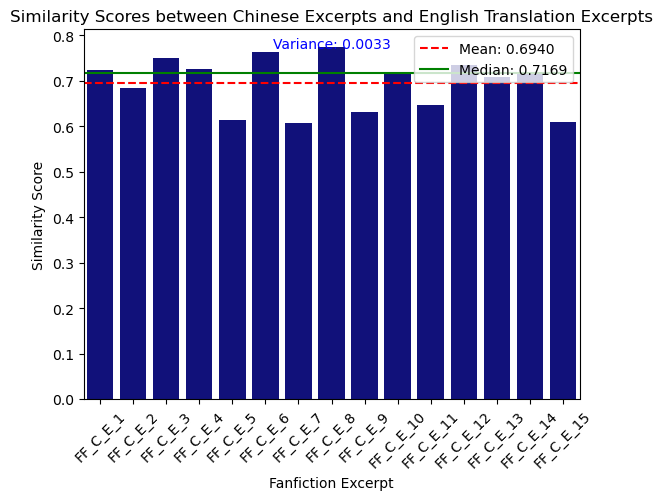

In [9]:
# Create Data
data = {
    "Fanfiction Excerpt": ["FF_C_E_1", "FF_C_E_2", "FF_C_E_3", "FF_C_E_4", "FF_C_E_5",
                "FF_C_E_6", "FF_C_E_7", "FF_C_E_8", "FF_C_E_9", "FF_C_E_10",
                "FF_C_E_11", "FF_C_E_12", "FF_C_E_13", "FF_C_E_14", "FF_C_E_15"],
    "Similarity": [0.7235,0.6842,0.7503,0.7262,0.6141, 0.7631, 0.6081, 0.7742, 0.6306, 0.7194, 0.6475, 0.7344, 0.7089, 0.7169, 0.6093]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate statistics
mean_value = df['Similarity'].mean()
median_value = df['Similarity'].median()
variance_value = df['Similarity'].var()

# Plot bar graph
plt.figure()
bar = sns.barplot(x="Fanfiction Excerpt", y="Similarity", data=df, color='darkblue')
plt.title("Similarity Scores between Chinese Excerpts and English Translation Excerpts")
plt.xlabel("Fanfiction Excerpt")
plt.ylabel("Similarity Score")
plt.axhline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.4f}')
plt.axhline(median_value, color='green', linestyle='-', label=f'Median: {median_value:.4f}')

# Add variance in the chart's title or annotation
plt.annotate(f'Variance: {variance_value:.4f}', xy=(0.5, 0.95), xycoords='axes fraction', ha='center', color='blue')

# Display legend
plt.legend()

plt.xticks(rotation=45)
plt.show()